In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os

# 1. Merge city level all information

In [18]:
CURATED_FOLDER = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_curated"
TRANSFORM_FOLDER = "D:/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_transformed/t_city_profiles"

gdp = pd.read_csv(os.path.join(CURATED_FOLDER,"c_city_profiles", "c_city_gdp.csv"))
flux = pd.read_csv(os.path.join(TRANSFORM_FOLDER, "t_ffdas_flux_2015.csv"))
gdp['city_lower'] = gdp['City'].apply(lambda x: x.lower().replace(" ", "").split(",")[0])
profiledf = flux.merge(gdp, on = 'city_lower', how = 'inner')
print(profiledf['city_lower'].nunique(), " city profiles found")
# gdp['city_lower'].nunique()

127  city profiles found


In [19]:
profiledf.columns

Index(['city_lower', 'total_flux', 'mean_flux', 'flux_n_points', 'City',
       'country_clean', 'State/Province', 'urban_pop', 'Metro',
       'gdp_billion_metro', 'gdp_pop_metro', 'source_year', 'gdp_per_cap',
       'gdp_per_cap_country_2022'],
      dtype='object')

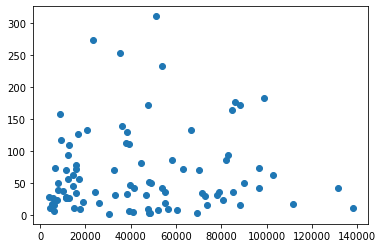

In [22]:
# check relationship betwen gdp and flux
import matplotlib.pyplot as plt
plt.scatter(profiledf['gdp_per_cap'], profiledf['total_flux'])

In [13]:
remain = [x for x in gdp['city_lower'] if x not in profiledf['city_lower'].tolist()]
remain

[]

In [33]:
FILENAME_CROSS = "01_seg_dalys_cross.csv"
y = ['diabetes_mellitus_cap', 'mental_and_substance_use_disorders_cap',
       'cardiovascular_diseases_cap', 'road_injury_cap','num_person_killed_per_lakh']

crossdf = pd.read_csv(os.path.join(CURATED_FOLDER, "c_analysis", FILENAME_CROSS)).drop(["urban_pop"], axis = 1)
crossdf['city_lower'] = crossdf['city_lower'].apply(lambda x: x.lower().replace(" ", "").split(",")[0])
mergedf = profiledf.merge(crossdf, on = ['city_lower','country_clean'], how = 'inner')
print(mergedf['city_lower'].nunique())

127


In [34]:
mergedf.columns

Index(['city_lower', 'total_flux', 'mean_flux', 'flux_n_points', 'City',
       'country_clean', 'State/Province', 'urban_pop', 'Metro',
       'gdp_billion_metro', 'gdp_pop_metro', 'source_year', 'gdp_per_cap',
       'gdp_per_cap_country_2022', 'hex_id', 'res', 'img_count', 'building',
       'greenery', 'street_furniture', 'sidewalk', 'car', 'person', 'bike',
       'sky', 'road', 'res_count', 'street_furniture_count', 'car_count',
       'person_count', 'bike_count', 'pop_country', 'diabetes_mellitus_cap',
       'mental_and_substance_use_disorders_cap', 'cardiovascular_diseases_cap',
       'road_injury_cap', 'num_person_killed_per_lakh', 'num_person_killed',
       'log_building', 'log_greenery', 'log_street_furniture', 'log_sidewalk',
       'log_car', 'log_person', 'log_bike', 'log_sky', 'log_road',
       'log_diabetes_mellitus_cap',
       'log_mental_and_substance_use_disorders_cap',
       'log_cardiovascular_diseases_cap', 'log_road_injury_cap'],
      dtype='object')

In [35]:
for res in [6,9]:
    temp = mergedf[mergedf['res'] == res].drop(['res','City'], axis = 1)
    temp.to_csv(os.path.join(CURATED_FOLDER, "c_analysis", f"c_cross_res={res}.csv"), 
                index = False)

# 2. Add Hex level information